## NLP- Hotel Sentiment Classifier

Based on Hotel Review data taken from Kaggle, I create a classifier to detect postive and negative sentiment of any given review. Detecting an overall sentiment value of a given review is useful for categorizing data and overal emotional takeaways that guest have after their stay at hotels. This would be useful in detecting situations where hotels continue to recieve negative labels, given the data, one could create a cluster analysis possible on an NER (named entity recognition) or tf-idf(term-frequency, inverse-document-frequency product). A potential cluster analysis on such metrics would help identify actual words to map reasons to poor performing hotels, identified by our data and model. Data is publicly available but primarly owned through Booking.com.

Data is given to us, seperated into Positive and Negative categories. This gives us an innate binary sentiment label indicating whether a given text is expressing a positive or negative emotional value. With Spark NLP, we created and averaged Glove embeddings of reviews and fed this feature scalar value into a Spark ML Lib Logistic Regression pipeline, no additional hyper parameters were set. We reported our the given Review, our predicition, and the ground truth, label, columns below. 

Generally, word embeddings are fed into CNN or BiDirectional LSTM cell wHere the embeddings are acted on like time series data. Ideally, we would want to use BERT embeddings, but due to a bug in our current version an update is required to use these BERT embeddings.Word embeddings are discussed further in the Neural Net section where I plan on implementing Neural Net approaches to review detection.


Results were still promising from the Averaged Glove embeddings.

Addiontionally an exploration of the data can be found here: [European Hotel Reviews with R](https://www.kaggle.com/spencerpitts/european-hotel-reviews-r) 
## PySpark Results

In [1]:
import pandas as pd
import numpy as np
import sklearn


df= pd.read_csv("gs://ca-sbox-es-science-444/data/nlpTest/Hotel_Reviews_AverageGlove_Predictions/part-00000-4857de86-8edc-493d-a00e-52f067f08f5b-c000.csv")
df.columns= ['Review_Text','Label',  'Prediction']
print(df.head(10))

                                         Review_Text  Label  Prediction
0  1 I booked a deluxe room a couple with 6 month...      0         0.0
1  1 Our biggest problem was related to the house...      0         0.0
2                          10 min walking from metro      0         1.0
3  11 am check out too early Central booking syst...      0         0.0
4  15 min walk from St Pancreas Kings X station N...      1         1.0
5  4 5 km to city centre room service woke us up ...      0         1.0
6  5 minute from the city center kind and helpful...      1         1.0
7  50 deposit for one night I thought was excessi...      0         0.0
8                         A bit away from the center      0         0.0
9                 A bit expensive and noisy at night      0         0.0


In [2]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp= confusion_matrix(df.Label, df.Prediction).ravel()

In [3]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

Acc= accuracy_score(df.Label, df.Prediction)
Prec= precision_score(df.Label, df.Prediction)
Recall= recall_score(df.Label, df.Prediction)
TPR= Recall
TNR= tn/(tn+fp)
FPR= fp/(fp+tn)
FNR= fn/(tp+fn)
F1= f1_score(df.Label, df.Prediction)

In [4]:
print("+--------------------------------+\n"
      "| Accuracy: \t\t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| Precision: \t\t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| Recall: \t\t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| True Positive Rate: \t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| True Negative Rate: \t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| False Positive Rate: \t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| False Negative Rate: \t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| F1 Score: \t\t {:.3f} \t |\n"
      "+--------------------------------+\n"
      .format(Acc, Prec, Recall, TPR, TNR, FPR, FNR, F1))


print("\t\t                         Predictions\n"
      "\t\t+---------------+---------------+---------------+\n"
      "\t\t|\t\t|\t1\t|\t0\t|\n"
      "\t\t+---------------+---------------+---------------+\n"
      "Ground Truth\t|\t1\t|\t{0}\t|\t{1}\t|\n"
      "\t\t+---------------+---------------+---------------+\n"
      "\t\t|\t0\t|\t{2}\t|\t{3}\t|\n"
      "\t\t+---------------+---------------+---------------+\n".format(tp,fn,fp, tn))

+--------------------------------+
| Accuracy: 		 0.865 	 |
+--------------------------------+
| Precision: 		 0.893 	 |
+--------------------------------+
| Recall: 		 0.869 	 |
+--------------------------------+
| True Positive Rate: 	 0.869 	 |
+--------------------------------+
| True Negative Rate: 	 0.860 	 |
+--------------------------------+
| False Positive Rate: 	 0.140 	 |
+--------------------------------+
| False Negative Rate: 	 0.131 	 |
+--------------------------------+
| F1 Score: 		 0.881 	 |
+--------------------------------+

		                         Predictions
		+---------------+---------------+---------------+
		|		|	1	|	0	|
		+---------------+---------------+---------------+
Ground Truth	|	1	|	1000	|	151	|
		+---------------+---------------+---------------+
		|	0	|	120	|	736	|
		+---------------+---------------+---------------+



*I would like to import ROC curve, but did not have time ...*

## Classifying with Neural Nets 

This is our preferred approach, to take advantage of Word Embeddings either Glove, word2Vec, or BERT(recommended), we pipe our embeddings into Neural Nets which where we break down embeddings into almost 'time series' data, at least this is how the model will interpret these embeddings. 

Words occur in a time sequence, some of the most popular approaches to NLP, like conversing chat-bots, docment summarizers, and speech recognition perform most optimally when using recursive neural nets (RNNs) as well as BiDirectional Long Short Term Memory Cells (LSTMs) to 'remember' these embedding's vector representation from the 'time series' like word embeddings. 

These embedding vectors which are generally grouped into words, sentences, and documents quantitatively represent the syntactic menaning of how the review/ text/ words/ sentences/ paragraphs relate to the chosen label category, which in our case encaptures positive or negative emotion.  

In [5]:
import tensorflow
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D

dfk= pd.read_json("gs://ca-sbox-es-science-444/data/nlpTest/Hotel_Reviews_Glove_JSON/part-00000-147e5a02-21ba-42cd-a8c4-69780ae574c3-c000.json",lines= True)
dfk.head(2)
# :TODO:
# bigquery --> Keras CNN/LSTM --> predictions 

Using TensorFlow backend.


,Review,embeddings,label
0,Location was within walking distance to main ...,"[[-0.15414, -0.44185, 0.67888, 0.6419100000000...",1
1,Superb Hotel Great Room Great Amenities and P...,"[[0.028738, -0.15464, -0.15188000000000001, -0...",1


In [6]:
print('Length of first sentence:',len(dfk.iloc[1]['embeddings']))
print('Length of each word embedding:',len(dfk.iloc[1]['embeddings'][0]))

Length of first sentence: 8
Length of each word embedding: 100


In [7]:
max= np.max([len(x) for x in dfk.embeddings])
        
print('Length of longest sentence:',max)

Length of longest sentence: 169


This means that for each row, padding (row token vectors + row padding vectors) = 169

In [8]:
X= np.array(dfk.embeddings)
y= np.array(dfk.label)

In [53]:
X.shape, y.shape

((10000,), (10000,))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= .2)

In [11]:
X_train= sequence.pad_sequences(
    np.array(X_train),
    value= np.zeros(100),
    padding='post',
    maxlen=25
)
y_train= np.array(y_train).reshape(y_train.shape[0], 1)

X_test= sequence.pad_sequences(
    np.array(X_test),
    value= np.zeros(100),
    padding='post',
    maxlen=25
)
y_test= np.array(y_test).reshape(y_test.shape[0], 1)

# X_train= np.array([X_train]) 
# y_train= np.array([y_train])
# X_test= np.array([X_test])
# y_test= np.array([y_test])

In [12]:
sequence.pad_sequences(
    np.array(X_train),
    value= np.zeros(100),
    padding='post',
    maxlen=25
).shape

(8000, 25, 100)

In [60]:
top_words= len(np.unique(dfk.embeddings))
embedding_vecor_length = 100
max_review_length= 25
epochs= 20
batch_size= 30
print('Vocab Size: {}'.format(top_words))

Vocab Size: 9461


In [61]:
model = Sequential()
# model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(units= 3, input_shape= (max_review_length, embedding_vecor_length)))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 3)                 1248      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 1,252
Trainable params: 1,252
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history= model.fit(X_train, 
          y_train,
          batch_size=batch_size,
          validation_split= .1,
          epochs=epochs)

Train on 7200 samples, validate on 800 samples
Epoch 1/20
7200/7200 [==============================] - 3s 378us/step - loss: 0.6844 - accuracy: 0.5678 - val_loss: 0.6529 - val_accuracy: 0.6400
Epoch 2/20
7200/7200 [==============================] - 2s 321us/step - loss: 0.5601 - accuracy: 0.7782 - val_loss: 0.5157 - val_accuracy: 0.7887
Epoch 3/20
7200/7200 [==============================] - 2s 310us/step - loss: 0.4696 - accuracy: 0.8144 - val_loss: 0.4863 - val_accuracy: 0.7900
Epoch 4/20
7200/7200 [==============================] - 2s 312us/step - loss: 0.4463 - accuracy: 0.8272 - val_loss: 0.4630 - val_accuracy: 0.8075
Epoch 5/20
7200/7200 [==============================] - 2s 311us/step - loss: 0.4228 - accuracy: 0.8367 - val_loss: 0.4600 - val_accuracy: 0.8112
Epoch 6/20
7200/7200 [==============================] - 2s 308us/step - loss: 0.4098 - accuracy: 0.8408 - val_loss: 0.4447 - val_accuracy: 0.8225
Epoch 7/20
7200/7200 [==============================] - 2s 311us/step - loss:

In [64]:
preds = model.evaluate(X_test, y_test, batch_size=batch_size)
# print('Test score: {}\nTest accuracy: {}'.format(score, acc))

2000/2000 [==============================] - 0s 89us/step


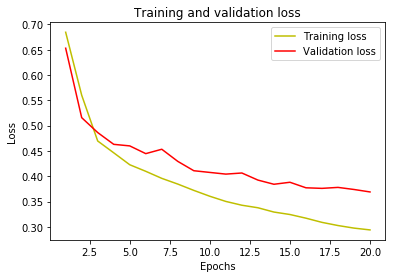

In [65]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

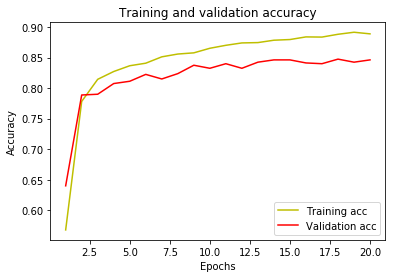

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
probs= model.predict_proba(X_test).reshape(-1)
preds= [1 if x > .5 else 0 for x in probs]
preds[0:10]

[0, 0, 1, 0, 0, 1, 0, 1, 1, 1]

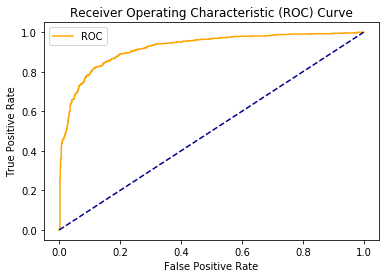

In [68]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [69]:
tn, fp, fn, tp= confusion_matrix(y_test, preds).ravel()

In [70]:
Acc= accuracy_score(y_test, preds)
Prec= precision_score(y_test, preds)
Recall= recall_score(y_test, preds)
TPR= Recall
TNR= tn/(tn+fp)
FPR= fp/(fp+tn)
FNR= fn/(tp+fn)
F1= f1_score(y_test, preds)

In [71]:
print("+--------------------------------+\n"
      "| Accuracy: \t\t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| Precision: \t\t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| Recall: \t\t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| True Positive Rate: \t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| True Negative Rate: \t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| False Positive Rate: \t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| False Negative Rate: \t {:.3f} \t |\n"
      "+--------------------------------+\n"
      "| F1 Score: \t\t {:.3f} \t |\n"
      "+--------------------------------+\n"
      .format(Acc, Prec, Recall, TPR, TNR, FPR, FNR, F1))
print("\t\t                         Predictions\n"
      "\t\t+---------------+---------------+---------------+\n"
      "\t\t|\t\t|\t1\t|\t0\t|\n"
      "\t\t+---------------+---------------+---------------+\n"
      "Ground Truth\t|\t1\t|\t{0}\t|\t{1}\t|\n"
      "\t\t+---------------+---------------+---------------+\n"
      "\t\t|\t0\t|\t{2}\t|\t{3}\t|\n"
      "\t\t+---------------+---------------+---------------+\n".format(tp,fn,fp, tn))

+--------------------------------+
| Accuracy: 		 0.847 	 |
+--------------------------------+
| Precision: 		 0.862 	 |
+--------------------------------+
| Recall: 		 0.856 	 |
+--------------------------------+
| True Positive Rate: 	 0.856 	 |
+--------------------------------+
| True Negative Rate: 	 0.834 	 |
+--------------------------------+
| False Positive Rate: 	 0.166 	 |
+--------------------------------+
| False Negative Rate: 	 0.144 	 |
+--------------------------------+
| F1 Score: 		 0.859 	 |
+--------------------------------+

		                         Predictions
		+---------------+---------------+---------------+
		|		|	1	|	0	|
		+---------------+---------------+---------------+
Ground Truth	|	1	|	937	|	157	|
		+---------------+---------------+---------------+
		|	0	|	150	|	756	|
		+---------------+---------------+---------------+

